In [23]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")
import tabula

# Load the data from the PDF into a CSV

In [2]:
# Load the dataset
try:
    df=pd.read_csv('2021-permits-raw.csv',index_col=0)
except:
    df = pd.concat(tabula.io.read_pdf('2021-permits.pdf', pages='all', stream=True), ignore_index=True)
    # Save the data to avoid re-running tabula.io
    df.to_csv('2021-permits-raw.csv') 
    
df.head()

,Unnamed: 0.1,Unnamed: 1,Minimum,Maximum,Unnamed: 2,Unnamed: 3,Minimum.1,Maximum.1,Unnamed: 4,Unnamed: 5,Minimum.2,Maximum.2,Unnamed: 6,Unnamed: 7,Unnamed: 8,Awarded,Unnamed: 9
0,Preferred Entry,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Preferred Entry Date,NaN,NaN,NaN,NaN,Awarded,Awarded Entry,NaN,Awarded
1,Date 1,Preferred Division 1,Acceptable,Requested,Preferred Entry Date 2,Preferred Division 2,Acceptable,Requested Group,3,Preferred Division 3,Acceptable,Requested,Results Status,Preference,Date,Entrance,Group Size
2,NaN,NaN,Group Size 1,Group Size 1,NaN,NaN,Group Size 2,Size 2,NaN,NaN,Group Size 3,Group Size 3,NaN,NaN,NaN,Code/Name,NaN
3,6/21/21,Colchuck Zone,2,2,6/28/21,Colchuck Zone,2,2,7/13/21,Stuart Zone,2,2,Unsuccessful,NaN,NaN,NaN,NaN
4,8/31/21,Colchuck Zone,2,2,9/1/21,Colchuck Zone,2,2,9/2/21,Colchuck Zone,2,2,Unsuccessful,NaN,NaN,NaN,NaN


# Clean the raw data from the PDF

In [3]:
# Clean the dataframe columns
def clean_dataframe(df):
    
    # Rename the columns 
    try:
        column_names = ['Entry Date 1', 'Zone 1', 'Min Group Size 1', 'Max Group Size 1',
            'Entry Date 2', 'Zone 2', 'Min Group Size 2', 'Max Group Size 2',
            'Entry Date 3', 'Zone 3', 'Min Group Size 3', 'Max Group Size 3',
            'Result Status', 'Awarded Preference', 'Awarded Entry Date', 'Awarded Zone', 'Awarded Group Size']
        df.columns = column_names
    except:
        pass
    
    # PDF to Dataframe added column labels in the data
    df=df[df.iloc[:,0] != 'Preferred Entry']
    df=df[df.iloc[:,0] != 'Date 1']
    df=df[df.iloc[:,2] != 'Group Size 1']
    
    # Remove 'Zone' From all dataframe Values
    df['Zone 1'] = (df['Zone 1'].str.split()).str.get(0)
    df['Zone 2'] = (df['Zone 2'].str.split()).str.get(0)
    df['Zone 3'] = (df['Zone 3'].str.split()).str.get(0)
    df['Awarded Zone'] = (df['Awarded Zone'].str.split()).str.get(0)
    
    # Convert all date columns to date time 
    df['Entry Date 1'] = pd.to_datetime(df['Entry Date 1'], errors='ignore')
    df['Entry Date 2'] = pd.to_datetime(df['Entry Date 2'], errors='ignore')
    df['Entry Date 3'] = pd.to_datetime(df['Entry Date 3'], errors='ignore')
    
    return df

In [4]:
clean_df = clean_dataframe(df)
clean_df.head(10)

,Entry Date 1,Zone 1,Min Group Size 1,Max Group Size 1,Entry Date 2,Zone 2,Min Group Size 2,Max Group Size 2,Entry Date 3,Zone 3,Min Group Size 3,Max Group Size 3,Result Status,Awarded Preference,Awarded Entry Date,Awarded Zone,Awarded Group Size
3,2021-06-21,Colchuck,2,2,2021-06-28,Colchuck,2,2,2021-07-13,Stuart,2,2,Unsuccessful,NaN,NaN,NaN,NaN
4,2021-08-31,Colchuck,2,2,2021-09-01,Colchuck,2,2,2021-09-02,Colchuck,2,2,Unsuccessful,NaN,NaN,NaN,NaN
5,2021-08-19,Colchuck,4,4,2021-08-19,Core,4,4,2021-08-26,Colchuck,4,4,Unsuccessful,NaN,NaN,NaN,NaN
6,2021-08-12,Colchuck,8,8,2021-08-19,Colchuck,8,8,NaT,NaN,NaN,NaN,Unsuccessful,NaN,NaN,NaN,NaN
7,2021-07-09,Colchuck,4,4,2021-07-09,Snow,4,4,2021-07-09,Core,4,4,Unsuccessful,NaN,NaN,NaN,NaN
8,2021-09-06,Colchuck,5,5,2021-09-16,Core,4,4,2021-10-07,Core,5,5,Unsuccessful,NaN,NaN,NaN,NaN
9,2021-08-22,Colchuck,4,4,2021-08-15,Core,4,4,2021-09-05,Snow,4,4,Accepted,1,8/22/21,Colchuck,4
10,2021-08-25,Colchuck,6,6,2021-08-25,Core,6,6,2021-08-25,Eightmile/Caroline,6,6,Unsuccessful,NaN,NaN,NaN,NaN
11,2021-06-22,Colchuck,8,8,2021-06-24,Colchuck,8,8,2021-07-14,Colchuck,8,8,Unsuccessful,NaN,NaN,NaN,NaN
12,2021-08-19,Colchuck,8,8,2021-08-26,Colchuck,8,8,2021-09-23,Core,8,8,Unsuccessful,NaN,NaN,NaN,NaN


In [5]:
clean_df['Result Status'].unique()

array(['Unsuccessful', 'Accepted', 'Cancelled', 'No Response', 'Declined'],
      dtype=object)

In [6]:
column_names = ['entry_date', 'zone', 'min_group_size', 'max_group_size', 'result_status', 'awarded_preference']
successful_permit = ['Accepted', 'Cancelled', 'No Response', 'Declined']
    
# Create the individual dataframes
first_choice=clean_df.loc[:,['Entry Date 1', 'Zone 1', 'Min Group Size 1', 'Max Group Size 1', 'Result Status', 'Awarded Preference']]
first_choice.columns = column_names
first_choice['preference'] = 1
first_choice.awarded_preference.fillna(0, inplace=True)
first_choice.awarded_preference = first_choice.awarded_preference.astype(int)
first_choice.result_status = np.where(first_choice.result_status.isin(successful_permit),
                                      1,
                                      0)
first_choice.result_status = np.where(first_choice.awarded_preference == first_choice.preference,
                                      1,
                                      0)

first_choice

,entry_date,zone,min_group_size,max_group_size,result_status,awarded_preference,preference
3,2021-06-21,Colchuck,2,2,0,0,1
4,2021-08-31,Colchuck,2,2,0,0,1
5,2021-08-19,Colchuck,4,4,0,0,1
6,2021-08-12,Colchuck,8,8,0,0,1
7,2021-07-09,Colchuck,4,4,0,0,1
...,...,...,...,...,...,...,...
38018,2021-09-08,Stuart,6,6,1,1,1
38019,2021-09-27,Stuart,2,2,0,0,1
38020,2021-09-30,Stuart,4,4,0,0,1
38021,2021-10-07,Stuart,4,4,0,0,1


In [7]:
# Reduce the dataframe to show entry date, zone #, min and max group size, preference number, and if the result was successful
def stack_dataframes(df):
    
    column_names = ['entry_date', 'zone', 'min_group_size', 'max_group_size', 'result_status', 'awarded_preference']
    successful_permit = ['Accepted', 'Cancelled', 'No Response', 'Declined']
    
    # Create the individual dataframes for the three preferences
    first_choice=clean_df.loc[:,['Entry Date 1', 'Zone 1', 'Min Group Size 1', 'Max Group Size 1', 'Result Status', 'Awarded Preference']]
    first_choice.columns = column_names
    first_choice['preference'] = 1
    first_choice.awarded_preference.fillna(0, inplace=True)
    first_choice.awarded_preference = first_choice.awarded_preference.astype(int)
    first_choice.result_status = np.where(first_choice.result_status.isin(successful_permit),
                                        1,
                                        0)
    first_choice.result_status = np.where(first_choice.awarded_preference == first_choice.preference,
                                        1,
                                        0)
    
    second_choice=clean_df.loc[:,['Entry Date 1', 'Zone 1', 'Min Group Size 1', 'Max Group Size 1', 'Result Status', 'Awarded Preference']]
    second_choice.columns = column_names
    second_choice['preference'] = 1
    second_choice.awarded_preference.fillna(0, inplace=True)
    second_choice.awarded_preference = second_choice.awarded_preference.astype(int)
    second_choice.result_status = np.where(second_choice.result_status.isin(successful_permit),
                                        1,
                                        0)
    second_choice.result_status = np.where(second_choice.awarded_preference == second_choice.preference,
                                        1,
                                        0)
    
    third_choice=clean_df.loc[:,['Entry Date 1', 'Zone 1', 'Min Group Size 1', 'Max Group Size 1', 'Result Status', 'Awarded Preference']]
    third_choice.columns = column_names
    third_choice['preference'] = 1
    third_choice.awarded_preference.fillna(0, inplace=True)
    third_choice.awarded_preference = third_choice.awarded_preference.astype(int)
    third_choice.result_status = np.where(third_choice.result_status.isin(successful_permit),
                                        1,
                                        0)
    third_choice.result_status = np.where(third_choice.awarded_preference == third_choice.preference,
                                        1,
                                        0)
    

    
    # Concatenate the individiual dataframes together
    combined_dataframe = pd.concat([first_choice, second_choice],ignore_index=True)
    combined_dataframe = pd.concat([combined_dataframe, third_choice],ignore_index=True)
    
    combined_dataframe.drop(columns=['awarded_preference'],inplace=True)
    
    # Remove null values 
    combined_dataframe.dropna(inplace=True)

    return combined_dataframe

In [8]:
clean_df = stack_dataframes(clean_df)
clean_df.head()

,entry_date,zone,min_group_size,max_group_size,result_status,preference
0,2021-06-21,Colchuck,2,2,0,1
1,2021-08-31,Colchuck,2,2,0,1
2,2021-08-19,Colchuck,4,4,0,1
3,2021-08-12,Colchuck,8,8,0,1
4,2021-07-09,Colchuck,4,4,0,1


In [9]:
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110082 entries, 0 to 110081
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   entry_date      110082 non-null  datetime64[ns]
 1   zone            110082 non-null  object        
 2   min_group_size  110082 non-null  object        
 3   max_group_size  110082 non-null  object        
 4   result_status   110082 non-null  int64         
 5   preference      110082 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 5.9+ MB


In [10]:
# Set the astypes for each column
convert_dict = {'zone': str,
                'min_group_size': int,
                'max_group_size': int,
                }

clean_df = clean_df.astype(convert_dict)
clean_df.dtypes

entry_date        datetime64[ns]
zone                      object
min_group_size             int64
max_group_size             int64
result_status              int64
preference                 int64
dtype: object

In [11]:
# Save the cleaned data
clean_df.to_csv('2021-permits-clean.csv')

# Visualize the data

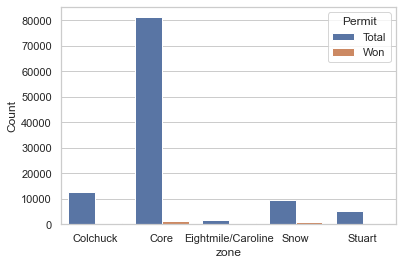

In [33]:
# Visualize the total permits per zone
def permits_by_zone(df):
    df_grp = (pd.concat({'Total': clean_df.groupby('zone').size(),
                        'Won': clean_df.groupby('zone')['result_status'].sum()})
              .reset_index()
              .rename(columns={'level_0': 'Permit', 0: 'Count'})
    )

    g = sns.barplot(x="zone", y="Count", hue="Permit", data=df_grp, ci=None)
    
permits_by_zone(clean_df)